In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



10.0 50.81


,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


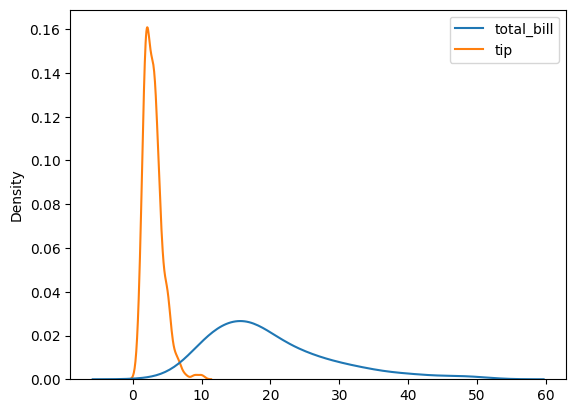

In [6]:
data = sns.load_dataset('tips')
data = data.iloc[:,[0,1]]
data.head()
print(data['tip'].max() ,  data['total_bill'].max())
sns.kdeplot(data)
data.head()

<Axes: ylabel='Density'>

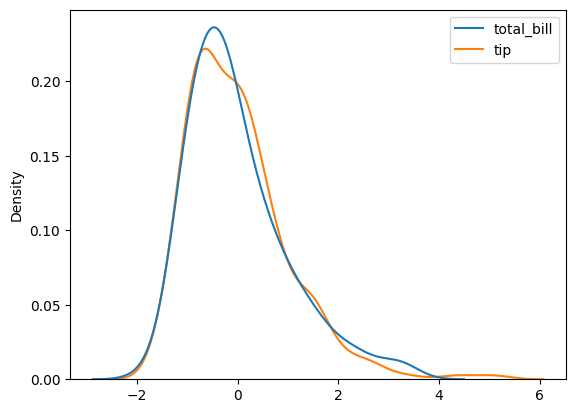

In [7]:
std = StandardScaler()
data = std.fit_transform(data)
data = pd.DataFrame(data, columns=['total_bill', 'tip'])
sns.kdeplot(data)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data[['total_bill']], data['tip'], test_size=0.25)
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)
accurace = model_linear.score(x_test, y_test)*100
coffeciant = model_linear.coef_[0]
intercept = model_linear.intercept_
print(f'Coefficient: {coffeciant}, Intercept: {intercept}')
train_Pred = model_linear.score(x_train,y_train)*100
test_pred = model_linear.score(x_test,y_test)*100
print(f'Train Accuracy: {train_Pred}, Test Accuracy: {test_pred} difference: {train_Pred - test_pred}')
model_linear.predict([[70]])


Coefficient: 0.7643508362927555, Intercept: -0.002279596680096939
Train Accuracy: 50.38449230347577, Test Accuracy: 22.59544694138701 difference: 27.789045362088757


c:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53.50227894])

Save and load models

In [ ]:

pickle.dump(model_linear,open('./saved_models/model_liner_01.pkl','wb') )
# Use the Save model 
model_linear = pickle.load(open('./saved_models/model_liner_01.pkl','rb'))